In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

# 1.   Основные тезисы

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Клиент – компания «Мегалайн» 
<br><br>Основных тарифных плана два: «Смарт» и «Ультра» 
<br><br>Задача – сделать предварительный анализ тарифов на выборке из 500 клиентов, основываясь на их поведении как абонентов
<br><br>Цель – выяснить, какой тариф приносит больше денег, для корректировки рекламного бюджета</div>

# 2.   Знакомство с данными

## 2.1.   Звонки

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Смотрим данные по звонкам</div>

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Изучаем информацию о них</div>

In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Явных пропусков нет</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим describe</div>

In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Минимум 0, максимум 38 минут, выглядит разумно</div>

In [6]:
print(calls.call_date.min())
print(calls.call_date.max())

2018-01-01
2018-12-31


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Даты логичные – с 1 января по 31 декабря, задействован весь год</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Сделаем культурно – переведем столбец с датами в соответствующий формат</div>

In [7]:
calls['call_date'] = pd.to_datetime(calls.call_date)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И округлим звонки до минут хитрой схемой: целые числа оставим как есть, нецелые – вверх</div>

In [8]:
calls['rounded_duration'] = np.ceil(calls.duration).astype(int)

In [9]:
calls.head()

,id,call_date,duration,user_id,rounded_duration
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выглядит разумно</div>

## 2.2.   Интернет

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Проводим те же манипуляции</div>

In [10]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Замечаем непонятный столбец, и методом логических выводов понимаем, что это какой-то счетчик пользователей, смысла в данном случае не имеющий. Удаляем</div>

In [11]:
internet = internet.drop('Unnamed: 0', axis=1)

In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Вновь ни одной ошибки</div>

In [13]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Минимум 0, максимум 1.7 Гб за сессию, вроде ничего сверхъестественного</div>

In [14]:
print(internet.session_date.min())
print(internet.session_date.max())

2018-01-01
2018-12-31


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Даты так же ведут себя прилично, следовательно, причесываем их в нужный формат</div>

In [15]:
internet['session_date'] = pd.to_datetime(internet.session_date)

## 2.3.   Сообщения

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И вновь по знакомой схеме</div>

In [16]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Снова ни одной ошибки, грузчикам премию, со времен первого проекта они сильно прокачались</div>

In [18]:
print(messages.message_date.min())
print(messages.message_date.max())

2018-01-02
2018-12-31


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Вновь усредняем тип данных</div>

In [19]:
messages['message_date'] = pd.to_datetime(messages.message_date)

## 2.4.   Тарифы

In [20]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Ничего лишнего</div>

## 2.5.   Пользователи

In [21]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пропущенные данные с датами отключения – хороший знак, значит, никто не ушел</div>

In [23]:
print(users.age.min())
print(users.age.max())

18
75


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Возраст соответствует действительности</div>

In [24]:
users.city.sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В городах нет дубликатов</div>

In [25]:
users.tariff.unique()

array(['ultra', 'smart'], dtype=object)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Тарифы в порядке. Необычайно чистые данные</div>

In [26]:
users['churn_date'] = pd.to_datetime(users.churn_date)
users['reg_date'] = pd.to_datetime(users.reg_date)

# 3.   Количество звонков и минут по месяцам

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для начала, выделим месяцы в звонках</div>

In [27]:
calls['month'] = calls.call_date.dt.month

In [28]:
calls.head()

,id,call_date,duration,user_id,rounded_duration,month
0,1000_0,2018-07-25,0.00,1000,0,7
1,1000_1,2018-08-17,0.00,1000,0,8
2,1000_2,2018-06-11,2.85,1000,3,6
3,1000_3,2018-09-21,13.80,1000,14,9
4,1000_4,2018-12-15,5.18,1000,6,12


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Отлично, теперь можно строить сводную по месяцам</div>

In [29]:
calls_pivot = calls.pivot_table(index=['month', 'user_id'], 
                  values=['rounded_duration'], 
                  aggfunc=['sum', 'count'])

In [30]:
calls_pivot.head()

sum            count
              rounded_duration rounded_duration
month user_id                                  
1     1005                  95               15
      1032                 380               61
      1045                   9                1
      1055                 551               64
      1071                 194               24

# 4.   Количество сообщений по месяцам

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Так же выделяем месяцы в отдельный столбец</div>

In [31]:
messages['month'] = messages.message_date.dt.month

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И делаем сводную таблицу</div>

In [32]:
messages_pivot = messages.pivot_table(index=['month', 'user_id'], 
                                      values=['message_date'], 
                                      aggfunc=['count'])

In [33]:
messages_pivot.head()

count
              message_date
month user_id             
1     1005               7
      1032              38
      1045               5
      1055              30
      1071              16

# 5.   Объем интернет-трафика по месяцам

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Та же участь для месяцев</div>

In [34]:
internet['month'] = internet.session_date.dt.month

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Та же сводная таблица</div>

In [35]:
internet_pivot = internet.pivot_table(index=['month', 'user_id'], 
                                      values=['mb_used'], 
                                      aggfunc=['sum'])

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И еще округлим суммарные данные за месяц до круглых Гб с применением нашей хитрой методики</div>

In [36]:
internet_pivot['rounded_gb_used'] = (internet_pivot['sum']['mb_used']
                                     .apply(
                                         lambda x: int(x) if x%1024 == 0 else int(x)//1024 + 1
                                     )
                                    )

In [37]:
internet_pivot.head()

sum rounded_gb_used
                mb_used                
month user_id                          
1     1005      2727.97               3
      1032     24127.69              24
      1045      2346.71               3
      1055     17090.88              17
      1071     15604.34              16

# 6.   Помесячная выручка

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
С каждого пользователя</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Нам перед глазами пригодятся две таблички</div>

In [38]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [39]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## 6.1.   Звонки

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выведем так же сводную по звонкам</div>

In [40]:
calls_pivot.head()

sum            count
              rounded_duration rounded_duration
month user_id                                  
1     1005                  95               15
      1032                 380               61
      1045                   9                1
      1055                 551               64
      1071                 194               24

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Добавим в нее необходимую информацию</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Тариф:</div>

In [41]:
calls_pivot['tariff_name'] = calls_pivot.merge(users, on='user_id', how='left')['tariff'].tolist()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Включенное количество минут:</div>

In [42]:
calls_pivot['minutes_included'] = (calls_pivot
                                   .merge(tariffs, on='tariff_name', how='left')['minutes_included']
                                   .tolist())

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Ежемесячную плату:</div>

In [43]:
calls_pivot['rub_monthly_fee'] = calls_pivot.merge(tariffs, on='tariff_name', how='left')['rub_monthly_fee'].tolist()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И плату за превышение лимита:</div>

In [44]:
calls_pivot['rub_per_minute'] = calls_pivot.merge(tariffs, on='tariff_name', how='left')['rub_per_minute'].tolist()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Рассчитаем тех, кто таки превысил и поплатился</div>

In [45]:
calls_pivot['fee_over'] = calls_pivot['minutes_included'] - calls_pivot['sum']['rounded_duration']
calls_pivot['fee_over'] = calls_pivot['fee_over'] * calls_pivot['rub_per_minute']
calls_pivot['fee_over'] = calls_pivot['fee_over'].apply(lambda x: abs(x) if x < 0 else 0)

In [46]:
calls_pivot

sum            count tariff_name minutes_included  \
              rounded_duration rounded_duration                                
month user_id                                                                  
1     1005                  95               15       smart              500   
      1032                 380               61       smart              500   
      1045                   9                1       smart              500   
      1055                 551               64       smart              500   
      1071                 194               24       smart              500   
...                        ...              ...         ...              ...   
12    1494                 418               62       smart              500   
      1495                1031              155       ultra             3000   
      1496                 518               80       smart              500   
      1497                 545               71       smart              500   
      1499                 492               69       smart              500   

              rub_monthly_fee rub_per_minute fee_over  
                                                       
month user_id                                          
1     1005                550              3        0  
      1032                550              3        0  
      1045                550              3        0  
      1055                550              3      153  
      1071                550              3        0  
...                       ...            ...      ...  
12    1494                550              3        0  
      1495               1950              1        0  
      1496                550              3       54  
      1497                550              3      135  
      1499                550              3        0  

[3174 rows x 7 columns]

## 6.2.   Сообщения

In [47]:
messages_pivot.head()

count
              message_date
month user_id             
1     1005               7
      1032              38
      1045               5
      1055              30
      1071              16

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь логика такая же – и такой же алгоритм</div>

In [48]:
messages_pivot['tariff_name'] = messages_pivot.merge(users, on='user_id')['tariff'].tolist()

In [49]:
messages_pivot['messages_included'] = messages_pivot.merge(tariffs, on='tariff_name')['messages_included'].tolist()

In [50]:
messages_pivot['rub_monthly_fee'] = messages_pivot.merge(tariffs, on='tariff_name')['rub_monthly_fee'].tolist()

In [51]:
messages_pivot['rub_per_message'] = messages_pivot.merge(tariffs, on='tariff_name')['rub_per_message'].tolist()

In [52]:
messages_pivot['fee_over'] = messages_pivot['messages_included'] - messages_pivot['count']['message_date']
messages_pivot['fee_over'] = messages_pivot['fee_over'] * messages_pivot['rub_per_message']
messages_pivot['fee_over'] = messages_pivot['fee_over'].apply(lambda x: abs(x) if x < 0 else 0)

In [53]:
messages_pivot

count tariff_name messages_included rub_monthly_fee  \
              message_date                                                 
month user_id                                                              
1     1005               7       smart                50             550   
      1032              38       smart                50             550   
      1045               5       smart                50             550   
      1055              30       smart                50             550   
      1071              16       smart                50             550   
...                    ...         ...               ...             ...   
12    1493              78       smart              1000            1950   
      1495              84       smart              1000            1950   
      1496              51       smart              1000            1950   
      1497              17       smart              1000            1950   
      1499              66       ultra              1000            1950   

              rub_per_message fee_over  
                                        
month user_id                           
1     1005                  3        0  
      1032                  3        0  
      1045                  3        0  
      1055                  3        0  
      1071                  3        0  
...                       ...      ...  
12    1493                  1        0  
      1495                  1        0  
      1496                  1        0  
      1497                  1        0  
      1499                  1        0  

[2717 rows x 6 columns]

## 6.3.   Интернет

In [54]:
internet_pivot.head()

sum rounded_gb_used
                mb_used                
month user_id                          
1     1005      2727.97               3
      1032     24127.69              24
      1045      2346.71               3
      1055     17090.88              17
      1071     15604.34              16

In [55]:
internet_pivot['tariff_name'] = internet_pivot.merge(users, on='user_id')['tariff'].tolist()

In [56]:
internet_pivot['gb_per_month_included'] = (internet_pivot
                                        .merge(tariffs, on='tariff_name')['mb_per_month_included'] // 1024).tolist() 

In [57]:
internet_pivot['rub_monthly_fee'] = internet_pivot.merge(tariffs, on='tariff_name')['rub_monthly_fee'].tolist()

In [58]:
internet_pivot['rub_per_gb'] = internet_pivot.merge(tariffs, on='tariff_name')['rub_per_gb'].tolist()

In [59]:
internet_pivot['fee_over'] = internet_pivot['gb_per_month_included'] - internet_pivot['rounded_gb_used']
internet_pivot['fee_over'] = internet_pivot['fee_over'] * internet_pivot['rub_per_gb']
internet_pivot['fee_over'] = internet_pivot['fee_over'].apply(lambda x: abs(x) if x < 0 else 0)

In [60]:
internet_pivot.head()

sum rounded_gb_used tariff_name gb_per_month_included  \
                mb_used                                                     
month user_id                                                               
1     1005      2727.97               3       smart                    15   
      1032     24127.69              24       smart                    15   
      1045      2346.71               3       smart                    15   
      1055     17090.88              17       smart                    15   
      1071     15604.34              16       smart                    15   

              rub_monthly_fee rub_per_gb fee_over  
                                                   
month user_id                                      
1     1005                550        200        0  
      1032                550        200     1800  
      1045                550        200        0  
      1055                550        200      400  
      1071                550        200      200

## 6.4.   Общая выручка

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выведем основные таблицы и соединим уже по абонентам</div>

In [61]:
calls_pivot_by_user = calls_pivot.pivot_table(index=['user_id', 'month'], 
                                              values=['fee_over'], 
                                              aggfunc='sum')
calls_pivot_by_user.head(10)

fee_over
                      
user_id month         
1000    5            0
        6            0
        7            0
        8            0
        9            0
        10           0
        11           0
        12           0
1001    11           0
        12           0

In [62]:
messages_pivot_by_user = messages_pivot.pivot_table(index=['user_id', 'month'], 
                                                    values=['fee_over'], 
                                                    aggfunc='sum')
messages_pivot_by_user.head(10)

fee_over
                      
user_id month         
1000    5            0
        6           30
        7           75
        8           93
        9           21
        10          69
        11           0
        12           0
1002    6            0
        7            0

In [63]:
internet_pivot_by_user = internet_pivot.pivot_table(index=['user_id', 'month'], 
                                                    values=['fee_over'], 
                                                    aggfunc='sum')
internet_pivot_by_user.head(10)

fee_over
                      
user_id month         
1000    5            0
        6         1600
        7            0
        8            0
        9            0
        10           0
        11           0
        12           0
1001    11           0
        12           0

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Присоеденим их всех в одну таблицу</div>

In [64]:
all_users_pivot = (calls_pivot_by_user
                   .join(messages_pivot_by_user, 
                         lsuffix='_calls', 
                         rsuffix='_messages', 
                         how='outer')
                   .join(internet_pivot_by_user, 
                         rsuffix='_internet', 
                         how='outer'))

all_users_pivot['fee_over_sum'] = (all_users_pivot['fee_over_calls'] + 
                                   all_users_pivot['fee_over_messages'] + 
                                   all_users_pivot['fee_over'])

all_users_pivot.columns = ['fee_over_calls', 
                           'fee_over_calls', 
                           'fee_over', 
                           'fee_over_sum']

all_users_pivot.head()

fee_over_calls  fee_over_calls  fee_over  fee_over_sum
user_id month                                                        
1000    5                 0.0             0.0       0.0           0.0
        6                 0.0            30.0    1600.0        1630.0
        7                 0.0            75.0       0.0          75.0
        8                 0.0            93.0       0.0          93.0
        9                 0.0            21.0       0.0          21.0

In [65]:
all_users_pivot.index.get_level_values(0).nunique()

498

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Кажется, у нас два человека не пользовались никакими услугами. Будем лояльны и тоже добавим их в эту таблицу</div>

In [66]:
users.query('user_id not in @all_users_pivot.index.get_level_values(0)')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [67]:
temp_users = pd.DataFrame({'user_id': (users
                                       .query('user_id not in @all_users_pivot.index.get_level_values(0)')['user_id']
                                       .tolist()), 
                           'month': [1, 1], 
                           'fee_over_calls':[0, 0], 
                           'fee_over_messages': [0, 0], 
                           'fee_over': [0, 0], 
                           'fee_over_sum': [0, 0]})
temp_users = temp_users.pivot_table(index=['user_id', 'month'], values=['fee_over_calls', 
                                                           'fee_over_calls', 
                                                           'fee_over', 
                                                           'fee_over_sum'], 
                       aggfunc='sum')
temp_users.columns = all_users_pivot.columns
temp_users

,,fee_over_calls,fee_over_calls,fee_over,fee_over_sum
user_id,month,,,,
1128,1,0,0,0,0
1371,1,0,0,0,0


In [68]:
all_users_pivot = pd.concat([all_users_pivot, temp_users], axis=0)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Так как мы соединяли всех принудительно, появились пропущенные значения, которые означают отсутствие оплаты.  Так и запишем</div>

In [69]:
all_users_pivot = all_users_pivot.fillna(0)

# 7.   Анализ полученных данных

## 7.1.   Минуты разговора

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим основные известные данные</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для smart</div>

In [70]:
print('Среднее значение:')
print(calls_pivot[calls_pivot.tariff_name == 'smart']['sum']['rounded_duration'].mean(), '\n')
print('Дисперсия:')
print(calls_pivot[calls_pivot.tariff_name == 'smart']['sum']['rounded_duration'].var(), '\n')
print('Стандартное отклонение:')
print(calls_pivot[calls_pivot.tariff_name == 'smart']['sum']['rounded_duration'].var()**(1/2), '\n')
print('Доступно бесплатно:', '\n500')

Среднее значение:
419.0629779577148 

Дисперсия:
35844.1895513438 

Стандартное отклонение:
189.3256177894154 

Доступно бесплатно: 
500


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для ultra</div>

In [71]:
print('Среднее значение:')
print(calls_pivot[calls_pivot.tariff_name == 'ultra']['sum']['rounded_duration'].mean(), '\n')
print('Дисперсия:')
print(calls_pivot[calls_pivot.tariff_name == 'ultra']['sum']['rounded_duration'].var(), '\n')
print('Стандартное отклонение:')
print(calls_pivot[calls_pivot.tariff_name == 'ultra']['sum']['rounded_duration'].var()**(1/2), '\n')
print('Доступно бесплатно:', '\n3000')

Среднее значение:
545.4511041009464 

Дисперсия:
94203.41839614809 

Стандартное отклонение:
306.9257538821858 

Доступно бесплатно: 
3000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Построим гистограмму</div>

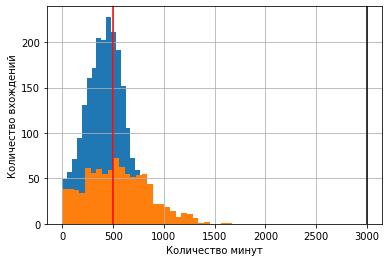

In [72]:
calls_pivot[calls_pivot.tariff_name == 'smart']['sum']['rounded_duration'].hist(bins=30)
calls_pivot[calls_pivot.tariff_name == 'ultra']['sum']['rounded_duration'].hist(bins=30)

plt.axvline(x=int(tariffs.query('tariff_name == "smart"')['minutes_included']), color ="red")
plt.axvline(x=int(tariffs.query('tariff_name == "ultra"')['minutes_included']), color ="black")

plt.xlabel('Количество минут')
plt.ylabel('Количество вхождений')

plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
АНАЛИТИКА ПО SMART</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Заметна небольшая отрицательная скошенность</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пользователям доступно 500 минут, и пик как раз приходится недалеко от этого значения</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Однако, можно заметить, что большая часть людей превышает свой лимит</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
АНАЛИТИКА ПО ULTRA</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь есть очень легкая отрицательная скошенность</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Однако, видно, что большинство людей не превышают в использовании ~870 минут разговора</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
До 3000 минут, которые включены в тариф, не доходит вообще никто</div>

## 7.2.   Сообщения

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для smart</div>

In [73]:
print('Среднее значение:')
print(messages_pivot[messages_pivot.tariff_name == 'smart']['count']['message_date'].mean(), '\n')
print('Дисперсия:')
print(messages_pivot[messages_pivot.tariff_name == 'smart']['count']['message_date'].var(), '\n')
print('Стандартное отклонение:')
print(messages_pivot[messages_pivot.tariff_name == 'smart']['count']['message_date'].var()**(1/2), '\n')
print('Доступно бесплатно:', '\n50')

Среднее значение:
45.04058272632674 

Дисперсия:
1215.8609237622834 

Стандартное отклонение:
34.86919734898243 

Доступно бесплатно: 
50


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для ultra</div>

In [74]:
print('Среднее значение:')
print(messages_pivot[messages_pivot.tariff_name == 'ultra']['count']['message_date'].mean(), '\n')
print('Дисперсия:')
print(messages_pivot[messages_pivot.tariff_name == 'ultra']['count']['message_date'].var(), '\n')
print('Стандартное отклонение:')
print(messages_pivot[messages_pivot.tariff_name == 'ultra']['count']['message_date'].var()**(1/2), '\n')
print('Доступно бесплатно:', '\n1000')

Среднее значение:
45.87169811320755 

Дисперсия:
1260.4721828810418 

Стандартное отклонение:
35.503129198438856 

Доступно бесплатно: 
1000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Гистограмма</div>

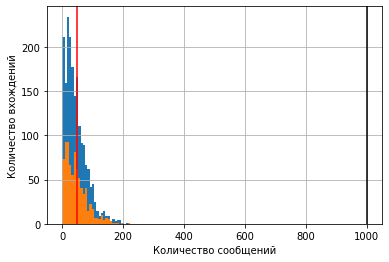

In [75]:
messages_pivot[messages_pivot.tariff_name == 'smart']['count']['message_date'].hist(bins=30)
messages_pivot[messages_pivot.tariff_name == 'ultra']['count']['message_date'].hist(bins=30)

plt.axvline(x=int(tariffs.query('tariff_name == "smart"')['messages_included']), color ="red")
plt.axvline(x=int(tariffs.query('tariff_name == "ultra"')['messages_included']), color ="black")

plt.xlabel('Количество сообщений')
plt.ylabel('Количество вхождений')

plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для наглядности уберем лимит сообщений для ultra</div>

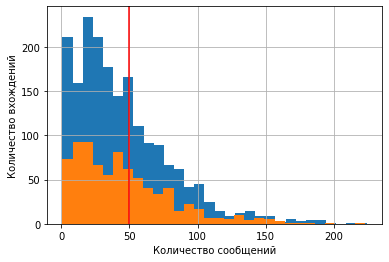

In [76]:
messages_pivot[messages_pivot.tariff_name == 'smart']['count']['message_date'].hist(bins=30)
messages_pivot[messages_pivot.tariff_name == 'ultra']['count']['message_date'].hist(bins=30)

plt.axvline(x=int(tariffs.query('tariff_name == "smart"')['messages_included']), color ="red")
# plt.axvline(x=int(tariffs.query('tariff_name == "ultra"')['messages_included']), color ="black")

plt.xlabel('Количество сообщений')
plt.ylabel('Количество вхождений')

plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
АНАЛИТИКА ДЛЯ SMART</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь видна сильная положительная скошенность</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Три пика – на 10, 24 и 45 минутах</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Меньше людей используют сообщения вне лимита, однако количество все еще внушительное</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
АНАЛИТИКА ДЛЯ ULTRA</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Сильная отрицательная скошенность – люди на этом тарифе не любят отправлять сообщения</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Большинство людей ограничевается 50 сообщениями в месяц, крайне малое количество – 100 сообщениями</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
До включенных в тариф 1000, опять же, никто не дошел</div>

## 7.3.   Интернет

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для smart</div>

In [77]:
print('Среднее значение:')
print(internet_pivot[internet_pivot.tariff_name == 'smart']['rounded_gb_used'].mean(), '\n')
print('Дисперсия:')
print(internet_pivot[internet_pivot.tariff_name == 'smart']['rounded_gb_used'].var(), '\n')
print('Стандартное отклонение:')
print(internet_pivot[internet_pivot.tariff_name == 'smart']['rounded_gb_used'].var()**(1/2), '\n')
print('Доступно бесплатно:', '\n15')

Среднее значение:
17.232495511669658 

Дисперсия:
55.25261218004271 

Стандартное отклонение:
7.433210085827167 

Доступно бесплатно: 
15


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для ultra</div>

In [78]:
print('Среднее значение:')
print(internet_pivot[internet_pivot.tariff_name == 'ultra']['rounded_gb_used'].mean(), '\n')
print('Дисперсия:')
print(internet_pivot[internet_pivot.tariff_name == 'ultra']['rounded_gb_used'].var(), '\n')
print('Стандартное отклонение:')
print(internet_pivot[internet_pivot.tariff_name == 'ultra']['rounded_gb_used'].var()**(1/2), '\n')
print('Доступно бесплатно:', '\n30')

Среднее значение:
17.646153846153847 

Дисперсия:
50.82640972990049 

Стандартное отклонение:
7.129264318981342 

Доступно бесплатно: 
30


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Гистограмма</div>

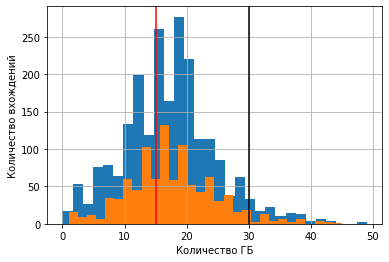

In [79]:
internet_pivot[internet_pivot.tariff_name == 'smart']['rounded_gb_used'].hist(bins=30)
internet_pivot[internet_pivot.tariff_name == 'ultra']['rounded_gb_used'].hist(bins=30)

plt.axvline(x=int(tariffs.query('tariff_name == "smart"')['mb_per_month_included']//1024), color ="red")
plt.axvline(x=int(tariffs.query('tariff_name == "ultra"')['mb_per_month_included']//1024), color ="black")

plt.xlabel('Количество ГБ')
plt.ylabel('Количество вхождений')

plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
АНАЛИТИКА ДЛЯ SMART</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Распределение почти нормальное, с заметными пиками</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пики приходятся на крайние 14 Гб, но большинство докупает 5 Гб и дотягивает их</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Малое количество людей используют интернет до 14 и после 20 Гб</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
АНАЛИТИКА ДЛЯ ULTRA</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь почти нормальное распределение, с большими пиками на различных значениях</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Самый большой пик – на 20 Гб, после 30 Гб мало людей используют интернет</div>

## 7.4.   Общий вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
На тарифе smart все услуги имеют превышения лимита и значительная часть людей покупает допольнительные пакеты</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
На тарифе ultra минуты и звонки по полной не использует никто, однако заметная часть людей покупает дополнительные Гб</div>

# 8.   Гипотезы

## 8.1.   Ручные рассчеты выручки

### 8.1.1.   Средняя выручка звонков сверх лимита

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на звонки всех абонентов</div>

In [80]:
calls_pivot['full_fee'] = calls_pivot['rub_monthly_fee'] + calls_pivot['fee_over']
calls_pivot.head()

sum            count tariff_name minutes_included  \
              rounded_duration rounded_duration                                
month user_id                                                                  
1     1005                  95               15       smart              500   
      1032                 380               61       smart              500   
      1045                   9                1       smart              500   
      1055                 551               64       smart              500   
      1071                 194               24       smart              500   

              rub_monthly_fee rub_per_minute fee_over full_fee  
                                                                
month user_id                                                   
1     1005                550              3        0      550  
      1032                550              3        0      550  
      1045                550              3        0      550  
      1055                550              3      153      703  
      1071                550              3        0      550

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Разделим их по тарифам</div>

In [81]:
calls_pivot_smart = calls_pivot[calls_pivot['tariff_name'] == 'smart']
calls_pivot_ultra = calls_pivot[calls_pivot['tariff_name'] == 'ultra']

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выведем сренюю помесячную для смарта</div>

In [82]:
display(calls_pivot_smart.pivot_table(index='month', values='fee_over', aggfunc='mean'))

month
1       4.500000
2      44.482759
3     103.480519
4      80.651786
5      82.531915
6      88.766871
7     103.358209
8     122.564103
9     129.544402
10    133.382253
11    131.961905
12    204.526786
Name: fee_over, dtype: float64

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И так же для ультра</div>

In [83]:
display(calls_pivot_ultra.pivot_table(index='month', values='fee_over', aggfunc='mean'))

month
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: fee_over, dtype: int64

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Построим барплот с ними обоими и сравним</div>

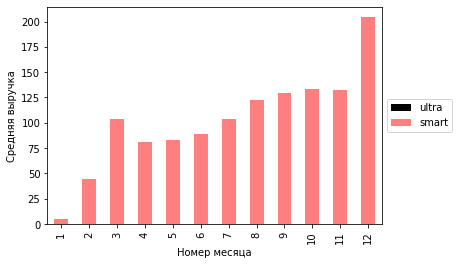

In [84]:
calls_pivot_ultra.pivot_table(index='month', 
                              values='fee_over', 
                              aggfunc='mean').plot(kind='bar', 
                                                   color='black', 
                                                   label='ultra', 
                                                   width=1/3)
calls_pivot_smart.pivot_table(index='month', 
                              values='fee_over', 
                              aggfunc='mean').plot(kind='bar', 
                                                   color='red', 
                                                   label='smart', 
                                                   alpha=0.5)
plt.xlabel('Номер месяца')
plt.ylabel('Средняя выручка')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Как видно, пользователи тарифа ultra вообще не используют минуты сверх лимита, в то время как за год переплаты абонентов тарифа smart увеличились</div>

### 8.1.2.   Средняя выручка сообщений сверх лимита

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Действуем по той же схеме</div>

In [85]:
messages_pivot['full_fee'] = messages_pivot['rub_monthly_fee'] + messages_pivot['fee_over']
messages_pivot.head()

count tariff_name messages_included rub_monthly_fee  \
              message_date                                                 
month user_id                                                              
1     1005               7       smart                50             550   
      1032              38       smart                50             550   
      1045               5       smart                50             550   
      1055              30       smart                50             550   
      1071              16       smart                50             550   

              rub_per_message fee_over full_fee  
                                                 
month user_id                                    
1     1005                  3        0      550  
      1032                  3        0      550  
      1045                  3        0      550  
      1055                  3        0      550  
      1071                  3        0      550

In [86]:
messages_pivot_smart = messages_pivot[messages_pivot['tariff_name'] == 'smart']
messages_pivot_ultra = messages_pivot[messages_pivot['tariff_name'] == 'ultra']

In [87]:
display(messages_pivot_smart.pivot_table(index='month', values='fee_over', aggfunc='mean'))

month
1      6.157895
2      6.777778
3     23.268293
4     20.545455
5     25.218750
6     29.727273
7     35.338983
8     37.277512
9     34.663212
10    42.932432
11     0.000000
12     0.000000
Name: fee_over, dtype: float64

In [88]:
display(messages_pivot_ultra.pivot_table(index='month', values='fee_over', aggfunc='mean'))

month
2     12.250000
3     38.250000
4     20.750000
5     31.043478
6     32.909091
7     35.400000
8     29.566265
9     37.608000
10    36.866667
11     0.000000
12     0.000000
Name: fee_over, dtype: float64

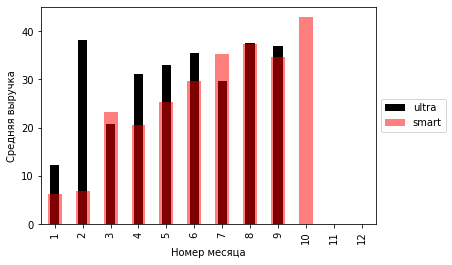

In [89]:
messages_pivot_ultra.pivot_table(index='month', 
                              values='fee_over', 
                              aggfunc='mean').plot(kind='bar', 
                                                   color='black', 
                                                   label='ultra',
                                                   width=1/3)
messages_pivot_smart.pivot_table(index='month', 
                              values='fee_over', 
                              aggfunc='mean').plot(kind='bar',
                                                   color='red', 
                                                   label='smart', 
                                                   alpha=.5)
plt.xlabel('Номер месяца')
plt.ylabel('Средняя выручка')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь картина менее однозначная: в два последних месяца вообще никто не превышал лимиты, и в начале года тариф ultra превышал по выручке тариф smart</div>

### 8.1.3.   Средняя выручка интернета сверх лимита

In [90]:
internet_pivot['full_fee'] = internet_pivot['rub_monthly_fee'] + internet_pivot['fee_over']
internet_pivot.head()

sum rounded_gb_used tariff_name gb_per_month_included  \
                mb_used                                                     
month user_id                                                               
1     1005      2727.97               3       smart                    15   
      1032     24127.69              24       smart                    15   
      1045      2346.71               3       smart                    15   
      1055     17090.88              17       smart                    15   
      1071     15604.34              16       smart                    15   

              rub_monthly_fee rub_per_gb fee_over full_fee  
                                                            
month user_id                                               
1     1005                550        200        0      550  
      1032                550        200     1800     2350  
      1045                550        200        0      550  
      1055                550        200      400      950  
      1071                550        200      200      750

In [91]:
internet_pivot_smart = internet_pivot[internet_pivot['tariff_name'] == 'smart']
internet_pivot_ultra = internet_pivot[internet_pivot['tariff_name'] == 'ultra']

In [92]:
display(internet_pivot_smart.pivot_table(index='month', values='fee_over', aggfunc='mean'))

month
1     195.348837
2     321.428571
3     810.638298
4     552.755906
5     749.333333
6     867.096774
7     779.787234
8     841.176471
9     735.200000
10    803.846154
11     44.769231
12     69.421488
Name: fee_over, dtype: float64

In [93]:
display(internet_pivot_ultra.pivot_table(index='month', values='fee_over', aggfunc='mean'))

month
2     458.333333
3     380.000000
4     490.000000
5     887.719298
6     606.521739
7     910.679612
8     891.176471
9     851.612903
10    734.265734
11     45.967742
12     62.946429
Name: fee_over, dtype: float64

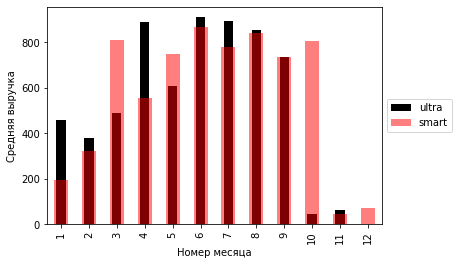

In [94]:
internet_pivot_ultra.pivot_table(index='month', 
                              values='fee_over', 
                              aggfunc='mean').plot(kind='bar', 
                                                   color='black', 
                                                   label='ultra',
                                                   width=1/3)
internet_pivot_smart.pivot_table(index='month', 
                              values='fee_over', 
                              aggfunc='mean').plot(kind='bar',
                                                   color='red', 
                                                   label='smart', 
                                                   alpha=.5)
plt.xlabel('Номер месяца')
plt.ylabel('Средняя выручка')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

### 8.1.4.   Вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выручка действительно отличается, но на тарифе smart она растет, а на ultra лишь интернет создает разницу в выручках помесячно</div>

## 8.2.   Вероятностные рассчеты выручки

### 8.2.1.   Гипотеза

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Обозначим нулевую гипотезу: 
<br><br>- Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются
<br><br>Тогда альтернативная будет:
<br><br>- Средняя выручка пользователей тарифов "Ультра" и "Смарт" не различаются</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Если не подтвердится нулевая гипотеза, соответственно, выручка с пользователей разных тарифов не будет различаться, то за истинную мы примем альтернативную гипотезу</div>

### 8.2.2.   Выручка с каждого пользователя за месяц

In [95]:
# добавляем тариф каждого пользователя
all_users_pivot['tariff'] = (all_users_pivot
 .merge(users[['user_id', 'tariff']], on='user_id', how='left')
 .merge(tariffs[['tariff_name', 'rub_monthly_fee']], left_on='tariff', right_on='tariff_name')['tariff_name']
 .tolist())

# добавляем ежемесячную плату
all_users_pivot['monthly_fee'] = (all_users_pivot
 .merge(tariffs[['tariff_name', 'rub_monthly_fee']], left_on='tariff', right_on='tariff_name')['rub_monthly_fee']
 .tolist())

# добавляем город пользователя
all_users_pivot['city'] = (all_users_pivot
 .merge(users[['user_id', 'city']], on='user_id', how='left')['city']
 .tolist())

# рассчитываем доход от пользователя за месяц
all_users_pivot['month_fee'] = all_users_pivot['monthly_fee'] + all_users_pivot['fee_over_sum']

all_users_pivot

fee_over_calls  fee_over_calls  fee_over  fee_over_sum tariff  \
user_id month                                                                  
1000    5                 0.0             0.0       0.0           0.0  ultra   
        6                 0.0            30.0    1600.0        1630.0  ultra   
        7                 0.0            75.0       0.0          75.0  ultra   
        8                 0.0            93.0       0.0          93.0  ultra   
        9                 0.0            21.0       0.0          21.0  ultra   
...                       ...             ...       ...           ...    ...   
1499    10                0.0             0.0       0.0           0.0  smart   
        11              336.0             0.0       0.0         336.0  smart   
        12                0.0             0.0       0.0           0.0  smart   
1128    1                 0.0             0.0       0.0           0.0  smart   
1371    1                 0.0             0.0       0.0           0.0  smart   

               monthly_fee       city  month_fee  
user_id month                                     
1000    5             1950  Краснодар     1950.0  
        6             1950  Краснодар     3580.0  
        7             1950  Краснодар     2025.0  
        8             1950  Краснодар     2043.0  
        9             1950  Краснодар     1971.0  
...                    ...        ...        ...  
1499    10             550      Пермь      550.0  
        11             550      Пермь      886.0  
        12             550      Пермь      550.0  
1128    1              550   Волжский      550.0  
1371    1              550       Омск      550.0  

[3216 rows x 8 columns]

In [96]:
smart_users_pivot = all_users_pivot.query('tariff == "smart"')
ultra_users_pivot = all_users_pivot.query('tariff == "ultra"')

smart_users_month_fee = smart_users_pivot['month_fee'].tolist()
ultra_users_month_fee = ultra_users_pivot['month_fee'].tolist()

### 8.2.3.   Расчеты

In [97]:
results = st.ttest_ind(smart_users_month_fee,
                       ultra_users_month_fee,
                       equal_var = False)

In [98]:
results.pvalue

3.8540514286984096e-288

### 8.2.4.   Вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Значения очень малы, так что при любом alpha гипотеза оказыается подтверждена</div>

## 8.3.   Вероятностные расчеты регионов

### 8.3.1.   Гипотеза

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Нулевая гипотеза звучит следующим образом:
<br><br>- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
<br><br>Альтернативную гипотезу сформулируем так:
<br><br>- Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Если не подтвердится нулевая гипотеза, соответственно, выручка с пользователей из Москвы не будет отличаться от выручки с пользователей из регионов, то за истинную мы примем альтернативную гипотезу</div>

### 8.3.2.   Расчеты

In [99]:
moscow_users_pivot = all_users_pivot.query('city == "Москва"')
regions_users_pivot = all_users_pivot.query('city != "Москва"')

moscow_users_pivot_fee = moscow_users_pivot['month_fee'].tolist()
regions_users_pivot_fee = regions_users_pivot['month_fee'].tolist()

In [100]:
regions_results = st.ttest_ind(moscow_users_pivot_fee,
                       regions_users_pivot_fee,
                       equal_var = False)

In [101]:
regions_results.pvalue

0.40844519197438356

### 8.3.3.   Вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Очень высокий показатель p-value, вследствие чего мы принимаем за истину нулевую гипотезу</div>

# 9.   Общий вывод

## 9.1.   Полученные данные

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Данные оказались чистыми, без ошибок и аномальных значений
<br><br>Даты приведены к нужному формату, лишние столбцы выкинуты</div>

## 9.2.   Анализ полученных данных

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Тариф smart разумно подходит к своим лимитам – большинство людей остаются в их границах, используя по полной
<br><br>Однако, и процет людей, приносящих дополнительную прибыль посредством покупки дополнительных пакетов, высок
<br><br>Тариф ultra имеет излишний лимит сообщений и минут, который не расходуют даже на половину
<br><br>На тарифе ultra разумным виден лимит интернета, так как достаточное количество людей докупают дополнительные Гб</div>

## 9.3.   Гипотезы

### 9.3.1.   Выручка по тарифам различается

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Это действительно так, выручка на тарифе smart и на тарифе ultra различается – как правило, со smart выручка больше, что доказывают и ручные рассчеты, и встроенные решения</div>

### 9.3.2.   Выручка по регионам отличается от Москвы

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Эта гипотеза не подтвердилась, выручка по регионам отличается не так сильно</div>

## 9.4.   Итог

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Наилучшим тарифом является тариф smart, так как там более точно подобраны </div>